In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio as f
from astropy.table import Table, join, vstack, hstack, unique
import pandas as pd
import glob
from astropy.io import fits
from desitarget.targetmask import bgs_mask, desi_mask, obsconditions
#print(plt.style.available)
#plt.style.use('seaborn-dark-palette')
import warnings
warnings.filterwarnings("ignore")

In [2]:
expo=Table(f.read('sv1-exposures.fits'))#,columns=cols))

In [3]:
print(expo.colnames)

['NIGHT', 'EXPID', 'FIELD', 'TARGETS', 'OBSCONDITIONS', 'EBV', 'SPECMODEL_SKY_GMAG_AB', 'SPECMODEL_SKY_RMAG_AB', 'SPECMODEL_SKY_ZMAG_AB', 'GFA_ORIGIN', 'B_DEPTH', 'R_DEPTH', 'Z_DEPTH', 'B_DEPTH_EBVAIR', 'R_DEPTH_EBVAIR', 'Z_DEPTH_EBVAIR', 'DAILY_BITPSFFN', 'DAILY_BITFRAMEFN', 'DAILY_BITSKYFN', 'DAILY_BITSFRAMEFN', 'DAILY_BITFLUXCALIBFN', 'DAILY_BITCFRAMEFN', 'TGT', 'SKY', 'STD', 'WD', 'LRG', 'ELG', 'QSO', 'BGS', 'MWS', 'TILEID', 'TILERA', 'TILEDEC', 'EXPTIME', 'MJDOBS', 'SKYMON_NEXP', 'SKYMON_SKYCAM0_MEAN', 'SKYMON_SKYCAM0_MEAN_ERR', 'SKYMON_SKYCAM1_MEAN', 'SKYMON_SKYCAM1_MEAN_ERR', 'SKYMON_AVERAGE_MEAN', 'SKYMON_AVERAGE_MEAN_ERR', 'GFA_AIRMASS', 'GFA_MOON_ILLUMINATION', 'GFA_MOON_ZD_DEG', 'GFA_MOON_SEP_DEG', 'GFA_TRANSPARENCY', 'GFA_FWHM_ASEC', 'GFA_SKY_MAG_AB', 'GFA_FIBER_FRACFLUX', 'GFA_FIBER_FRACFLUX_ELG', 'GFA_TRANSPFRAC', 'GFA_MAXCONTRAST', 'GFA_MINCONTRAST', 'GFA_KTERM', 'GFA_RADPROF_FWHM_ASEC', 'GFA_FIBERFAC', 'GFA_FIBERFAC_ELG', 'EPHEM_NOON', 'EPHEM_DUSK', 'EPHEM_DAWN', 'EPHEM

In [4]:
for i in list(set(expo["OBSCONDITIONS"])):
    print(i, obsconditions.names(i))

1 ['DARK']
2 ['GRAY']
4 ['BRIGHT']
-1 []


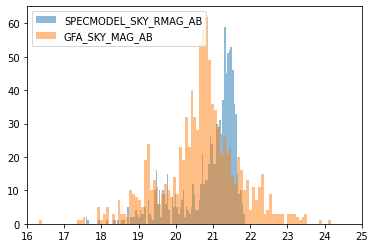

In [5]:
plt.hist(expo[expo["SPECMODEL_SKY_RMAG_AB"]>16]["SPECMODEL_SKY_RMAG_AB"],bins=100,label="SPECMODEL_SKY_RMAG_AB",alpha=0.5)
plt.hist(expo[expo["GFA_SKY_MAG_AB"]>16]["GFA_SKY_MAG_AB"],bins=100,label="GFA_SKY_MAG_AB",alpha=0.5)
plt.xlim(16,25)
plt.legend()
plt.show()

In [6]:
isBGS=expo["TARGETS"]=='BGS+MWS'
isSPEC=(expo["SPECMODEL_SKY_RMAG_AB"]>10)|(expo["SPECMODEL_SKY_RMAG_AB"]<=20.07)
isOBS=expo["OBSCONDITIONS"]==4
expos=expo[isBGS&isSPEC&isOBS]

In [7]:
expos

NIGHT,EXPID,FIELD,TARGETS,OBSCONDITIONS,EBV,SPECMODEL_SKY_GMAG_AB,SPECMODEL_SKY_RMAG_AB,SPECMODEL_SKY_ZMAG_AB,GFA_ORIGIN,B_DEPTH,R_DEPTH,Z_DEPTH,B_DEPTH_EBVAIR,R_DEPTH_EBVAIR,Z_DEPTH_EBVAIR,DAILY_BITPSFFN,DAILY_BITFRAMEFN,DAILY_BITSKYFN,DAILY_BITSFRAMEFN,DAILY_BITFLUXCALIBFN,DAILY_BITCFRAMEFN,TGT,SKY,STD,WD,LRG,ELG,QSO,BGS,MWS,TILEID,TILERA,TILEDEC,EXPTIME,MJDOBS,SKYMON_NEXP,SKYMON_SKYCAM0_MEAN,SKYMON_SKYCAM0_MEAN_ERR,SKYMON_SKYCAM1_MEAN,SKYMON_SKYCAM1_MEAN_ERR,SKYMON_AVERAGE_MEAN,SKYMON_AVERAGE_MEAN_ERR,GFA_AIRMASS,GFA_MOON_ILLUMINATION,GFA_MOON_ZD_DEG,GFA_MOON_SEP_DEG,GFA_TRANSPARENCY,GFA_FWHM_ASEC,GFA_SKY_MAG_AB,GFA_FIBER_FRACFLUX,GFA_FIBER_FRACFLUX_ELG,GFA_TRANSPFRAC,GFA_MAXCONTRAST,GFA_MINCONTRAST,GFA_KTERM,GFA_RADPROF_FWHM_ASEC,GFA_FIBERFAC,GFA_FIBERFAC_ELG,EPHEM_NOON,EPHEM_DUSK,EPHEM_DAWN,EPHEM_BRIGHTDUSK,EPHEM_BRIGHTDAWN,EPHEM_BRIGHTDUSK_LST,EPHEM_BRIGHTDAWN_LST,EPHEM_MOONRISE,EPHEM_MOONSET,EPHEM_MOON_ILLUM_FRAC,EPHEM_NEAREST_FULL_MOON
int64,int64,str30,str16,int16,float32,float32,float32,float32,str13,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,int64,int16,int16,int16,int16,int16,int16,int16,int16,int16,int64,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20201218,68685,Sextans,BGS+MWS,4,0.044,22.59913,21.591713,19.815464,matched_coadd,211.2,189.4,193.0,147.46558,150.44745,169.782,1073741823,1073741823,1073741823,1073741823,1073741823,1073741823,4200,800,238,16,484,22,19,3259,908,80614,154.1,-1.375,300.0,59202.54,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.2547284,0.26771516,157.51852,160.9304,0.9795233,1.3017554,20.859995,0.42440304,0.32437736,0.41571265,9.922746,5.434505,0.114,1.3015807,0.73979855,0.781237,59201.791666666664,59202.07819552423,59202.53794256821,59202.05746491799,59202.55867547271,-2.8037748348945115,178.12604437096692,59201.74867241028,59202.201215020024,0.24614796278654827,10.852906347514363
20201218,68686,Sextans,BGS+MWS,4,0.044,21.954332,21.336622,19.742577,matched_coadd,209.3,252.3,298.7,145.15799,199.74783,262.26755,1073741823,1073741823,1073741823,1073741823,1073741823,1073741823,4200,800,238,16,484,22,19,3259,908,80614,154.1,-1.375,300.0,59202.543,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.2734787,0.26834404,155.89848,160.95901,0.98452675,1.0251212,20.640165,0.5495888,0.40150297,0.5410848,10.148667,8.036708,0.114,1.0509386,0.9638542,0.97339135,59201.791666666664,59202.07819552423,59202.53794256821,59202.05746491799,59202.55867547271,-2.8037748348945115,178.12604437096692,59201.74867241028,59202.201215020024,0.24614796278654827,10.852906347514363
20201219,68790,Pegasus1,BGS+MWS,4,0.11,21.600029,21.184044,19.85958,matched_coadd,174.2,269.0,376.4,89.01581,169.13007,291.23727,1073741823,1073741823,1073741823,1073741823,1073741823,1073741823,4193,800,183,14,549,40,8,3288,870,80616,356.0,29.0,300.0,59203.066,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0058784,0.31673467,50.4551,43.910236,0.9462259,0.9198405,20.283892,0.6141169,0.44041976,0.5810933,12.103469,9.416936,0.114,0.9461422,1.0572368,1.0425442,59202.791666666664,59203.07851712843,59203.53830491269,59203.05778414151,59203.559039111955,-1.7028900334562422,179.24295716589722,59202.77445126726,59203.242718542955,0.3389210887196516,9.852906347514363
20201220,69016,Pegasus1,BGS+MWS,4,0.11,21.14826,20.853792,19.631004,matched_coadd,84.2,147.1,222.1,43.011932,92.47221,171.8327,1073741823,1073741823,1073741823,1073741823,1073741823,1073741823,4193,800,183,14,549,40,8,3288,870,80616,356.0,29.0,300.0,59204.066,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1.0067892,0.41235673,42.450527,36.82676,0.9682862,1.1083848,20.09371,0.5123302,0.37922204,0.49608225,12.160664,8.268759,0.114,1.1084076,0.8753392,0.8962373,59203.791666666664,59204.07885197336,59204.5386552597,59204.05811774869,59204.55

In [8]:
ctable=expos["NIGHT","EXPID","TILEID","OBSCONDITIONS"]

In [9]:
ctable

NIGHT,EXPID,TILEID,OBSCONDITIONS
int64,int64,int64,int16
20201218,68685,80614,4
20201218,68686,80614,4
20201219,68790,80616,4
20201220,69016,80616,4
20201220,69017,80616,4
20201222,69398,80616,4
20201222,69400,80617,4
20201222,69401,80617,4
20201222,69402,80617,4


In [10]:
for i in list(set(ctable["OBSCONDITIONS"])):
    print(i,obsconditions.names(i))

4 ['BRIGHT']


In [11]:
print("========================Observations Notes========================")
print("WE have",len(list(set(ctable["TILEID"]))), " tiles on blanc observations")
print("WE have",len(list(set(ctable["EXPID"]))), "exposures on blanc observations")
print("WE have",len(list(set(ctable["NIGHT"]))), "night on blanc observations until",str(np.max(list(set(ctable["NIGHT"])))))

========================Observations Notes========================
WE have 44  tiles on blanc observations
WE have 221 exposures on blanc observations
WE have 18 night on blanc observations until 20210215


In [12]:
def search(date,tile,expid):
    path = "/global/cfs/cdirs/desi/spectro/redux/daily/tiles/{}/{}".format(tile,date)
    zbest_files = glob.glob(path+"/zbest-*")
    #print(len(zbest_files))
    zbest_data = {}
    zbest_fibermap = {}
    for i, zbest_file in enumerate(zbest_files):
        #print(zbest_file)
        zbest_data[i] = Table.read(zbest_file, 'ZBEST')
        zbest_fibermap[i] = Table.read(zbest_file, 'FIBERMAP')
    zbest_data_all = vstack(list(zbest_data.values()))
    zbest_data_all.sort('TARGETID')
    fibermap_all = vstack(list(zbest_fibermap.values()))
    fibermap_all = fibermap_all[fibermap_all["EXPID"]==expid]
    fibermap_all.sort('TARGETID')
    #print(len(zbest_data_all),len(fibermap_all))
    return len(zbest_data_all), len(fibermap_all)

In [13]:
# Some problem with tiles: 20210102	80645	70571 ()
ctable=ctable[(ctable["NIGHT"]!=20210102)|(ctable["TILEID"]!=80645)|(ctable["EXPID"]!=70571)] # No ZBEST found..!
ctable=ctable[(ctable["NIGHT"]!=20210102)|(ctable["TILEID"]!=80645)|(ctable["EXPID"]!=70572)] # No ZBEST found..!
ctable=ctable[(ctable["NIGHT"]!=20210102)|(ctable["TILEID"]!=80645)|(ctable["EXPID"]!=70573)] # No ZBEST found..!
ctable=ctable[(ctable["NIGHT"]!=20210102)|(ctable["TILEID"]!=80660)|(ctable["EXPID"]!=70580)] # No ZBEST found..!
ctable=ctable[(ctable["NIGHT"]!=20210102)|(ctable["TILEID"]!=80660)|(ctable["EXPID"]!=70581)] # No ZBEST found..!
ctable=ctable[(ctable["NIGHT"]!=20210102)|(ctable["TILEID"]!=80660)|(ctable["EXPID"]!=70582)] # No ZBEST found..!
ctable=ctable[(ctable["NIGHT"]!=20210116)|(ctable["TILEID"]!=80665)|(ctable["EXPID"]!=72716)] # No NIGHT found..!
ctable

NIGHT,EXPID,TILEID,OBSCONDITIONS
int64,int64,int64,int16
20201218,68685,80614,4
20201218,68686,80614,4
20201219,68790,80616,4
20201220,69016,80616,4
20201220,69017,80616,4
20201222,69398,80616,4
20201222,69400,80617,4
20201222,69401,80617,4
20201222,69402,80617,4


In [14]:
lzbest,lfibermap=[],[]
for i in range(len(ctable)):
    ii=ctable["NIGHT"][i]
    jj=ctable["TILEID"][i]
    kk=ctable["EXPID"][i]
    #print(i,ii,jj,kk,search(ii,jj,kk)[0],search(ii,jj,kk)[1])
    lzbest.append(search(ii,jj,kk)[0])
    lfibermap.append(search(ii,jj,kk)[1])
lzbest,lfibermap=np.array(lzbest),np.array(lfibermap)
ctable["LZBEST"]=lzbest
ctable["LFIBERMAP"]=lfibermap
ctable=ctable[ctable["LZBEST"]==ctable["LFIBERMAP"]]

In [15]:
ctable

NIGHT,EXPID,TILEID,OBSCONDITIONS,LZBEST,LFIBERMAP
int64,int64,int64,int16,int64,int64
20201218,68685,80614,4,5000,5000
20201218,68686,80614,4,5000,5000
20201219,68790,80616,4,5000,5000
20201220,69016,80616,4,5000,5000
20201220,69017,80616,4,5000,5000
20201222,69398,80616,4,4500,4500
20201222,69400,80617,4,5000,5000
20201222,69401,80617,4,5000,5000
20201222,69407,80611,4,4500,4500


In [16]:
print("========================Observations Notes========================")
print("WE have",len(list(set(ctable["TILEID"]))), " tiles on blanc observations")
print("WE have",len(list(set(ctable["EXPID"]))), "exposures on blanc observations")
print("WE have",len(list(set(ctable["NIGHT"]))), "night on blanc observations until",str(np.max(list(set(ctable["NIGHT"])))))

========================Observations Notes========================
WE have 44  tiles on blanc observations
WE have 210 exposures on blanc observations
WE have 17 night on blanc observations until 20210215


In [17]:
print(np.sort(list(set(ctable["TILEID"]))))

[80611 80612 80613 80614 80616 80617 80618 80619 80624 80626 80627 80628
 80629 80632 80633 80635 80636 80637 80638 80639 80640 80641 80642 80643
 80644 80645 80646 80648 80649 80650 80651 80653 80654 80655 80656 80658
 80659 80660 80661 80662 80663 80664 80665 80666]


## Redshift sucessful..!

In [18]:
def redshift_success_rate(date,tile,expid,r_mag_min_bin=15.5,r_mag_max_bin=22):
    path = "/global/cfs/cdirs/desi/spectro/redux/daily/tiles/{}/{}".format(tile,date)
    zbest_files = glob.glob(path+"/zbest-*")
    #print(len(zbest_files))
    zbest_data = {}
    zbest_fibermap = {}
    for i, zbest_file in enumerate(zbest_files):
        zbest_data[i] = Table.read(zbest_file, 'ZBEST')
        zbest_fibermap[i] = Table.read(zbest_file, 'FIBERMAP')
    zbest_data_all = vstack(list(zbest_data.values()))
    zbest_data_all.sort('TARGETID')
    fibermap_all = vstack(list(zbest_fibermap.values()))
    fibermap_all = fibermap_all[fibermap_all["EXPID"]==expid]
    fibermap_all.sort('TARGETID')
    flux_r = fibermap_all['FLUX_R']#/fibermap_all['MW_TRANSMISSION_R']
    fibermap_all["rmag"] = np.where(flux_r<=0,np.nan,22.5-2.5*np.log10(flux_r))
    good_indices_rmag = ~((np.isnan(fibermap_all["rmag"]))|(np.isinf(fibermap_all["rmag"])))
    delta_r = 0.5
    #r_mag_min_bin,r_mag_max_bin=15.5,21
    r_mag_bins = np.arange(r_mag_min_bin,r_mag_max_bin, delta_r)
    #r_mag_bins = np.arange(18, 23.0, delta_r)
    z_warn0_frac = np.ones(len(r_mag_bins))
    z_warn0_frac_err = np.ones(len(r_mag_bins))
    Nn_tot=np.ones(len(r_mag_bins))
    Nn_no_warn=np.ones(len(r_mag_bins))
    for i,r_min in enumerate(r_mag_bins):
        #print(r_min)
        r_max = r_min + delta_r
        ii = (fibermap_all["rmag"]>r_min) & (fibermap_all["rmag"]<r_max)
        is_galaxy = zbest_data_all[ii]['SPECTYPE']=='GALAXY' 
        no_warning = (zbest_data_all[ii]['ZWARN']==0) & (zbest_data_all[ii]['DELTACHI2']>25)
        good_fiber = fibermap_all[ii]['FIBERSTATUS']==0

        n_tot = np.count_nonzero(is_galaxy)
        n_no_warn = np.count_nonzero(no_warning & is_galaxy)
        if n_tot>0:
            Nn_no_warn[i]=n_no_warn
            Nn_tot[i]=n_tot
            z_warn0_frac[i] = n_no_warn/n_tot
            z_warn0_frac_err[i] = np.sqrt(n_no_warn)/n_tot/2
    return r_mag_bins, z_warn0_frac, z_warn0_frac_err, Nn_no_warn, Nn_tot

In [19]:
def plot_redshift_success_rate(date,tile,expid,r_mag_min_bin=15.5,r_mag_max_bin=22):
    #plt.figure(figsize=(8,5))
    plt.errorbar(redshift_success_rate(date,tile,expid,r_mag_min_bin,r_mag_max_bin)[0], 
                 redshift_success_rate(date,tile,expid,r_mag_min_bin,r_mag_max_bin)[1],
                 redshift_success_rate(date,tile,expid,r_mag_min_bin,r_mag_max_bin)[2], 
                 capsize=1, fmt='o--', label=str(tile)+"-"+str(date)+"-"+str(expid), linewidth=1)
    plt.ylim([0,1.1])
    plt.xlabel('RMAG')
    plt.ylabel('FRACTION ZWARN==0')
    plt.legend()
    plt.grid()
    #plt.show()
    #return plt.show()

In [20]:
redshift_success_rate(20210131,80646,73958,15,21)

(array([15. , 15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ,
        20.5]),
 array([1.        , 1.        , 1.        , 1.        , 0.97297297,
        0.98684211, 0.99090909, 0.94652406, 0.8766756 , 0.84259259,
        0.7214886 , 0.62439024]),
 array([0.5       , 0.28867513, 0.16666667, 0.10425721, 0.08108108,
        0.05697536, 0.04745594, 0.03557255, 0.02424014, 0.01975068,
        0.01471507, 0.02759441]),
 array([  1.,   3.,   9.,  23.,  36.,  75., 109., 177., 327., 455., 601.,
        128.]),
 array([  1.,   3.,   9.,  23.,  37.,  76., 110., 187., 373., 540., 833.,
        205.]))

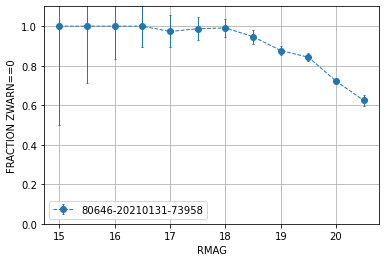

In [21]:
plot_redshift_success_rate(20210131,80646,73958,15,21)

In [22]:
ctable_r=unique(ctable, keys=['NIGHT','TILEID'], keep='first')
print(np.unique(ctable_r["NIGHT"],return_counts=True))
ctable_r

(<Column name='NIGHT' dtype='int64' length=17>
20201218
20201219
20201220
20201222
20201223
20210101
20210102
20210103
20210107
20210109
20210130
20210131
20210202
20210203
20210206
20210214
20210215, array([ 1,  1,  1,  7,  5, 12, 14, 13,  1,  1,  6,  7,  4,  1,  1,  1,  1]))


NIGHT,EXPID,TILEID,OBSCONDITIONS,LZBEST,LFIBERMAP
int64,int64,int64,int16,int64,int64
20201218,68685,80614,4,5000,5000
20201219,68790,80616,4,5000,5000
20201220,69016,80616,4,5000,5000
20201222,69407,80611,4,4500,4500
20201222,69429,80613,4,4500,4500
20201222,69459,80614,4,4500,4500
20201222,69398,80616,4,4500,4500
20201222,69400,80617,4,5000,5000
20201222,69414,80618,4,4500,4500


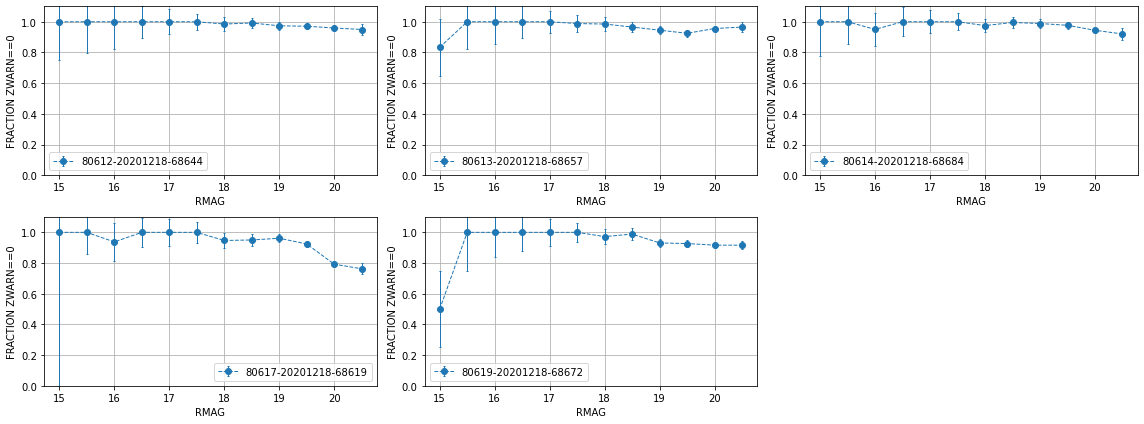

In [23]:
plt.figure(figsize=(16,6))
plt.subplot(2,3,1)
plot_redshift_success_rate(20201218,80612,68644,15,21)
plt.subplot(2,3,2)
plot_redshift_success_rate(20201218,80613,68657,15,21)
plt.subplot(2,3,3)
plot_redshift_success_rate(20201218,80614,68684,15,21)
plt.subplot(2,3,4)
plot_redshift_success_rate(20201218,80617,68619,15,21)
plt.subplot(2,3,5)
plot_redshift_success_rate(20201218,80619,68672,15,21)
plt.tight_layout()
plt.show()

In [24]:
def select_by_night(night):
    N=len(ctable_r[ctable_r["NIGHT"]==night])
    data=ctable_r[ctable_r["NIGHT"]==night]
    return data

In [25]:
def plot_by_night(night):
    N=len(select_by_night(night))
    plt.figure(figsize=(10,6))
    for i in range(N):
        plot_redshift_success_rate(select_by_night(night)["NIGHT"][i],
                               select_by_night(night)["TILEID"][i],
                               select_by_night(night)["EXPID"][i],15,21)
        plt.legend(title="NIGHT="+str(night),ncol=2,fontsize=14,title_fontsize=14)

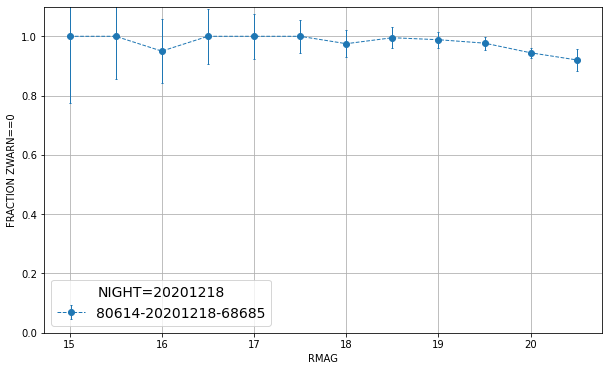

In [26]:
plot_by_night(20201218)

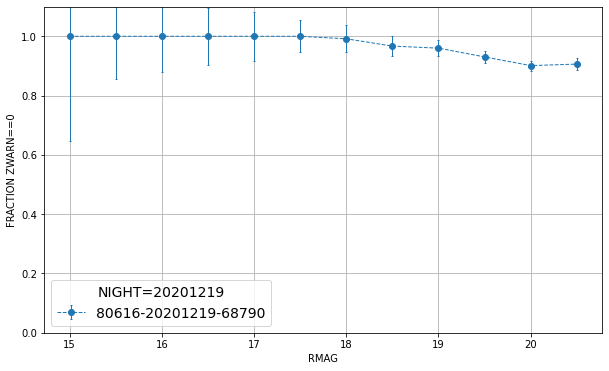

In [27]:
plot_by_night(20201219)

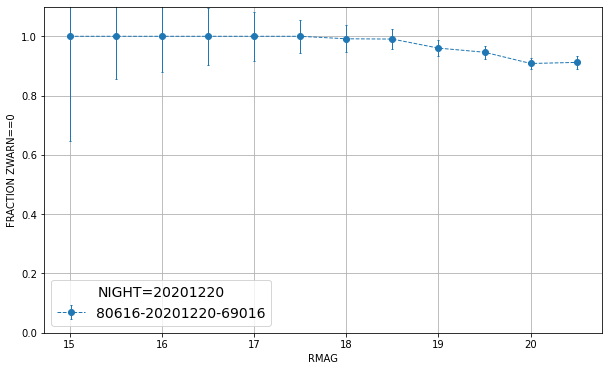

In [28]:
plot_by_night(20201220)

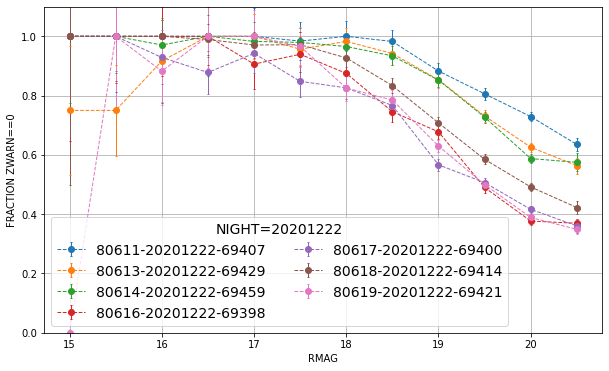

In [29]:
plot_by_night(20201222)

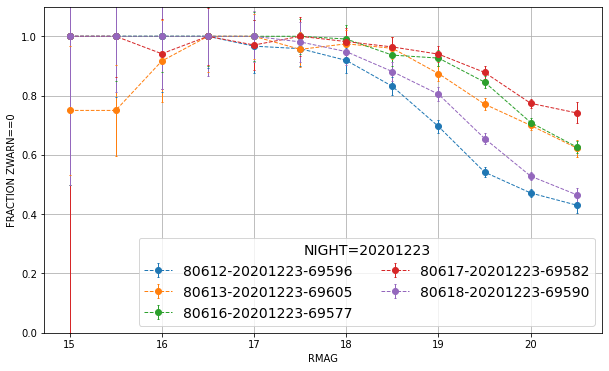

In [30]:
plot_by_night(20201223)

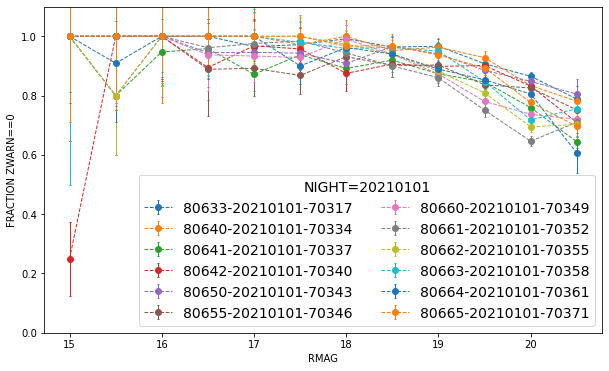

In [31]:
plot_by_night(20210101)

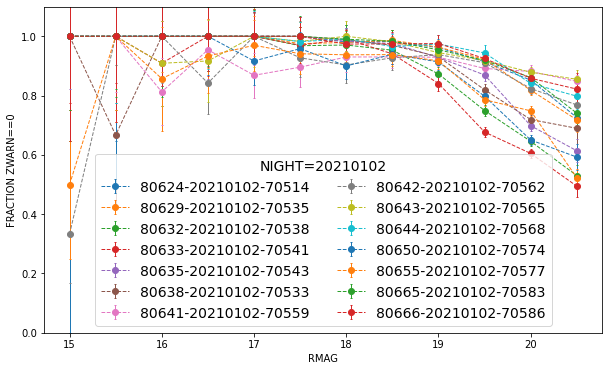

In [32]:
plot_by_night(20210102)

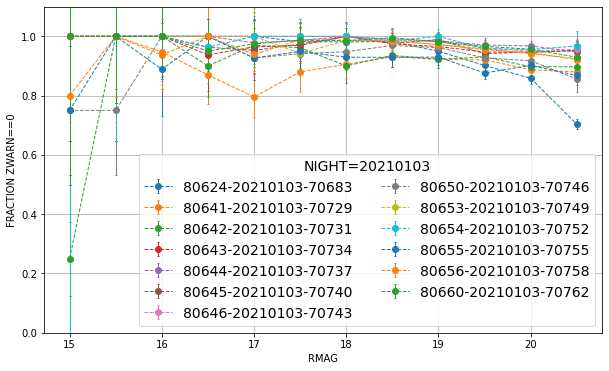

In [33]:
plot_by_night(20210103)

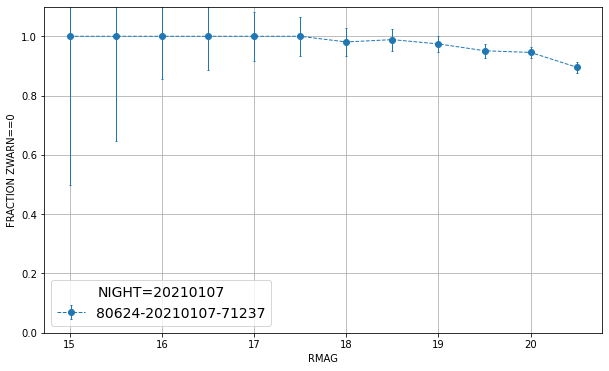

In [34]:
plot_by_night(20210107)

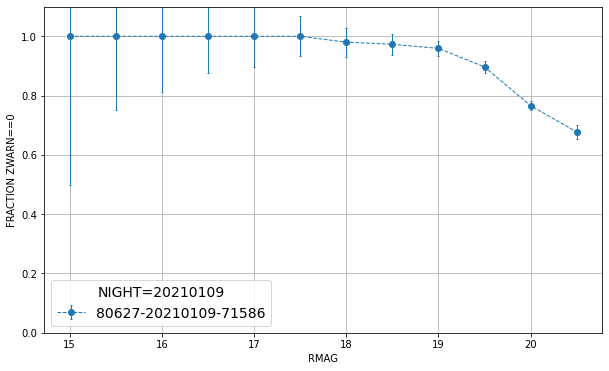

In [35]:
plot_by_night(20210109)

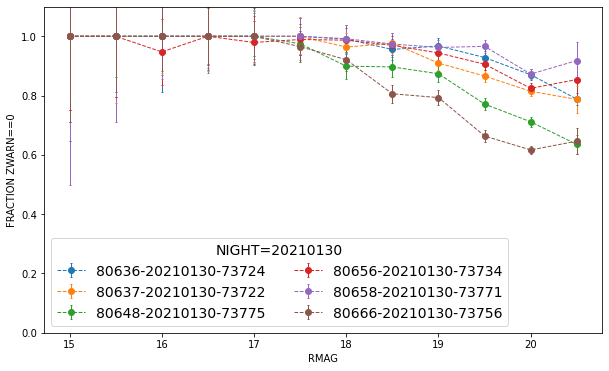

In [36]:
plot_by_night(20210130)

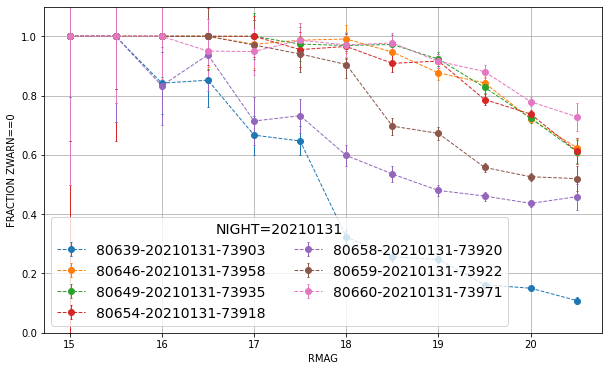

In [37]:
plot_by_night(20210131)

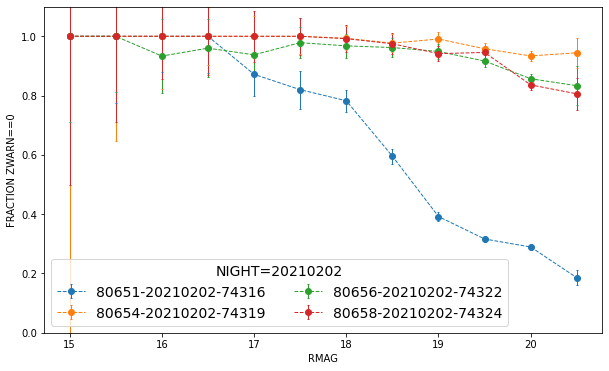

In [38]:
plot_by_night(20210202)

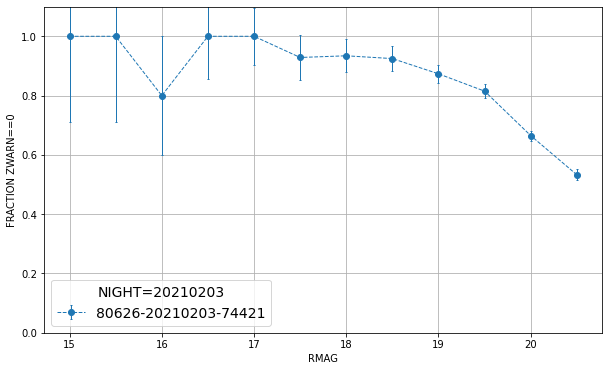

In [39]:
plot_by_night(20210203)

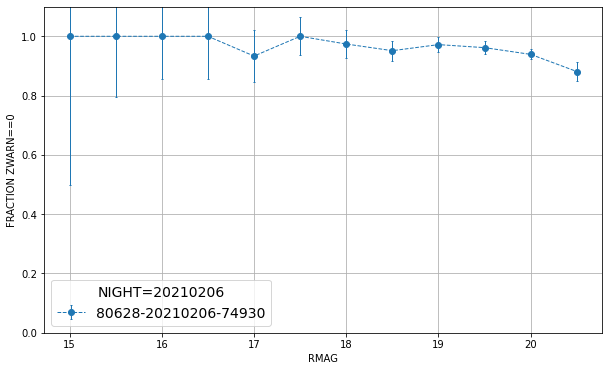

In [40]:
plot_by_night(20210206)

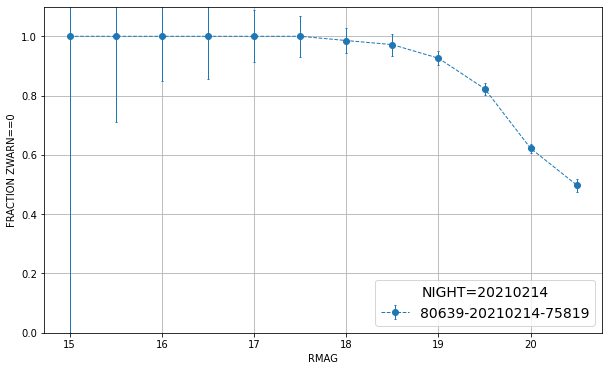

In [41]:
plot_by_night(20210214)

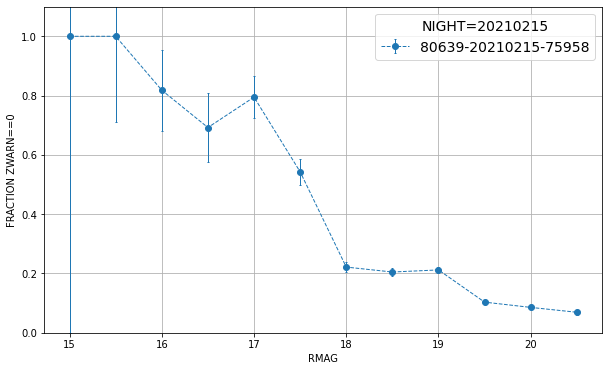

In [42]:
plot_by_night(20210215)

In [43]:
def data_for_rate(date,tile,expid,limi,lims):
    path = "/global/cfs/cdirs/desi/spectro/redux/daily/tiles/{}/{}".format(tile,date)
    zbest_files = glob.glob(path+"/zbest-*")
    #print(len(zbest_files))
    zbest_data = {}
    zbest_fibermap = {}
    for i, zbest_file in enumerate(zbest_files):
        zbest_data[i] = Table.read(zbest_file, 'ZBEST')
        zbest_fibermap[i] = Table.read(zbest_file, 'FIBERMAP')
    zbest_data_all = vstack(list(zbest_data.values()))
    zbest_data_all.sort('TARGETID')
    fibermap_all = vstack(list(zbest_fibermap.values()))
    fibermap_all = fibermap_all[fibermap_all["EXPID"]==expid]
    fibermap_all.sort('TARGETID')
    flux_r = fibermap_all['FLUX_R']#/fibermap_all['MW_TRANSMISSION_R']
    fibermap_all["rmag"] = np.where(flux_r<=0,np.nan,22.5-2.5*np.log10(flux_r))
    ii=(zbest_data_all["SPECTYPE"]=='GALAXY')&(zbest_data_all["ZWARN"]==0)&(fibermap_all["rmag"]>=limi)&(fibermap_all["rmag"]<=lims)&(zbest_data_all["DELTACHI2"]>25)
    zbest_data_all, fibermap_all = zbest_data_all[ii], fibermap_all[ii]
    return zbest_data_all, fibermap_all

In [44]:
data=Table(data_for_rate(20210215,80639,75958,18.5,19)[1])

In [45]:
data

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,NUM_ITER,FIBER_X,FIBER_Y,DELTA_X,DELTA_Y,FIBER_RA,FIBER_DEC,EXPTIME,NIGHT,EXPID,MJD,TILEID,rmag
int64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int32,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,float32
39627725547247884,0,337,337,452,0,72.73121061826959,-2.4427649085764296,0.0,0.0,2021.0034,5400.0,1152921504732676217,1,TGT,-57.19176,-336.61194,2000,0.980936291293435,5,9010,316258,6412,SER,11.203104,37.67922,89.19683,108.86391,31.023077,10.572382,0,,0.0,0.0,0.0,0.0,0726m025,0.06430632,292.90253,241.89568,0.6218643,0.2213631,1.9878279,6.6856294,15.82668,3.902191,10.471603,23.437126,0,3.325682,4.5105376,0.8387135,-0.0020007975,S,2000,1,1152921504732676217,131074,0,0,0,0,2,-57.182,-336.52,0.002,-0.003,72.7312186849271,-2.4427535042399295,239.2699,20210215,75958,59261.10124484,80639,18.559746
39627731591235901,0,192,192,352,0,72.83737857924135,-2.167320178188054,0.0,0.0,2021.0034,5400.0,1152921504606846976,1,TGT,-83.08548,-264.94556,2000,0.9629340545346281,4,9010,317699,2365,SER,16.279661,30.476799,46.9733,181.32072,58.16639,22.372902,0,,0.0,0.0,0.0,0.0,0728m022,0.06121929,43.73118,36.108852,2.101924,0.5582806,2.6711283,5.000561,7.707268,2.6716278,5.001083,7.7073565,0,1.2227814,2.2257762,-0.15650326,-0.29456463,S,2000,1,1152921504606846976,131074,0,0,0,0,2,-83.074,-264.882,0.003,-0.001,72.8373906776043,-2.1673161272833776,239.2699,20210215,75958,59261.10124484,80639,18.790077
39627731603816608,9,486,9486,4846,0,73.50552977164395,-2.2947664079038383,0.0,0.0,2021.0034,5400.0,1152921504606846976,1,TGT,-253.6497,-302.94238,2000,0.9467723560953085,4,9010,317702,160,REX,15.356858,25.135681,35.505394,104.564224,34.235794,14.717476,0,,0.0,0.0,0.0,0.0,0736m022,0.049994837,17.775948,-1.8510567,2.5305605,0.6352522,2.4064376,3.9387908,5.5637374,2.4268265,3.9619823,5.599367,0,1.0,1.6040086,0.0,0.0,S,2000,1,1152921504606846976,131074,0,0,0,0,2,-253.584,-302.877,-0.002,-0.007,73.50552307782625,-2.294740284204888,239.2699,20210215,75958,59261.10124498,80639,18.999273
39627737610061462,1,368,1368,830,0,71.56663625147709,-2.0089483432123054,0.0,0.0,2021.0034,5400.0,1152921504606846976,1,TGT,233.6063,-226.72577,2000,0.9176846008397984,4,9010,319134,1686,SER,12.025482,34.082455,67.10329,142.27106,42.597824,15.422867,0,,0.0,0.0,0.0,0.0,0716m020,0.032081667,83.946846,70.664604,1.83902,0.52533937,3.216443,9.115998,17.948046,3.2170265,9.116892,17.948866,0,1.5306191,1.4287648,0.25998098,-0.0986812,S,2000,1,1152921504606846976,131074,0,0,0,0,2,233.556,-226.689,0.001,-0.002,71.56663992657589,-2.0089406369693426,239.2699,20210215,75958,59261.10124484,80639,18.668673
39627737614254920,1,285,1285,800,0,71.78237534788084,-2.0506827833995698,0.0,0.0,2021.0034,5400.0,1152921504606846976,1,TGT,178.89871,-236.14261,2000,0.9879459809935149,4,9010,319135,840,EXP,21.070173,26.822205,22.07121,32.36573,10.982315,3.7435663,0,,0.0,0.0,0.0,0.0,0718m020,0.03436748,-36.526054,-25.459286

In [46]:
redshift_success_rate(20210215,80639,75958,15,21)

(array([15. , 15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ,
        20.5]),
 array([1.        , 1.        , 0.81818182, 0.69230769, 0.79487179,
        0.54285714, 0.22162162, 0.20502092, 0.21204819, 0.10338346,
        0.08567931, 0.06923077]),
 array([1.        , 0.28867513, 0.13636364, 0.11538462, 0.07138159,
        0.04403153, 0.01730574, 0.01464435, 0.01130221, 0.00697011,
        0.00512032, 0.00815892]),
 array([ 1.,  3.,  9.,  9., 31., 38., 41., 49., 88., 55., 70., 18.]),
 array([  1.,   3.,  11.,  13.,  39.,  70., 185., 239., 415., 532., 817.,
        260.]))